# Distâncias Até a Estação de Metrô Mais Próxima

## Fonte de Dados

http://www.data.rio/

http://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4

https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [1]:
%matplotlib inline
import geopandas as gpd

In [3]:
metro = gpd.read_file('../01.Dados/Transporte/Metro/Estacao_Metro.geojson')

In [4]:
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.32329 -22.84795)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (-43.31306 -22.85406)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (-43.30676 -22.86240)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (-43.29741 -22.86785)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (-43.28337 -22.87456)


In [5]:
metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [7]:
metro.crs

<Bound CRS: +proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0, ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (kilometre)
- N[north]: Northing (kilometre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Unknown based on GRS80 ellipsoid
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: unknown

In [8]:
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (672.041 7472.334)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (673.083 7471.645)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (673.719 7470.715)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (674.672 7470.100)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (676.104 7469.341)


In [9]:
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

<AxesSubplot:>

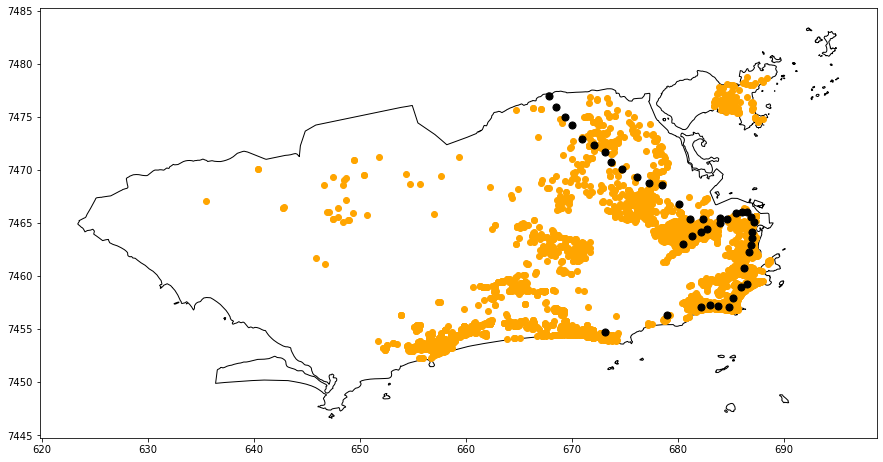

In [10]:
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
geo_dados.plot(ax=base, color='orange', alpha=1)
metro.plot(ax=base, color='black', markersize = 50)

In [11]:
geo_dados.iloc[0]

Area                                                  138
Bairro                           Recreio dos Bandeirantes
Cidade                                     Rio de Janeiro
Endereco                              Rua Vicente Scofano
Estado                                                 RJ
Latitude                                         -23.0165
Longitude                                        -43.4629
Quartos                                                 3
Suites                                                  1
Vagas                                                   3
Tipo                                          Apartamento
Transacao                                           Venda
Valor                                             1095000
Dist_Metro                                        15.6229
geometry      POINT (657.5137068691058 7453.832425203198)
Name: 0, dtype: object

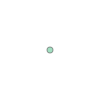

In [12]:
geo_dados.iloc[0].geometry

In [13]:
distances = metro.distance(geo_dados.iloc[0].geometry)

In [14]:
type(distances)

pandas.core.series.Series

In [15]:
distances

0     25.321516
1     24.623350
2     24.224237
3     23.881158
4     23.357575
5     23.523396
6     23.658163
7     23.401048
8     23.644084
9     24.209373
10    24.795188
11    25.596665
12    26.033173
13    26.295764
14    27.398579
15    28.659654
16    25.773027
17    26.716983
18    27.377518
19    30.455326
20    31.034097
21    31.466395
22    31.662650
23    31.695780
24    31.232661
25    31.026518
26    30.727260
27    30.401336
28    29.515734
29    29.476829
30    28.850631
31    29.407590
32    27.940690
33    28.901631
34    27.475584
35    24.743520
36    26.507063
37    25.728350
38    24.822792
39    21.589055
40    15.622939
dtype: float64

In [16]:
distances.min()

15.62293882499506

In [18]:
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

In [19]:
geo_dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,Dist_Metro,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,15.622939,POINT (657.514 7453.832)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,7.530741,POINT (670.524 7461.803)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,0.736973,POINT (674.345 7469.440)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,10.718039,POINT (662.701 7457.284)
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,17.131159,POINT (656.019 7453.574)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000,20.667831,POINT (648.664 7469.216)
4509,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000,18.189134,POINT (655.010 7452.944)
4510,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000,2.180300,POINT (683.909 7459.848)
4511,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000,2.558248,POINT (678.393 7464.417)


In [20]:
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


In [21]:
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

In [22]:
coef

-0.1956408316168678

In [23]:
1 * coef

-0.1956408316168678

In [24]:
10 * coef

-1.956408316168678

In [25]:
geo_dados.to_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')